# 6. Classification dengan KNN (K-Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat
- Prediksi yang dilakukan dapat diterapkan dengan baik pada classification maupun regression tasks

Refrensi:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

## Sample Dataset

In [1]:
import pandas as pd

sensus={
    'tinggi':[158, 170, 183, 191, 155, 168, 180, 150, 170],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 60],
    'jk':[
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita','wanita'
    ]
}
sensus_df=pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,168,59,wanita
6,180,67,wanita
7,150,54,wanita
8,170,60,wanita


## Visualisasi Data

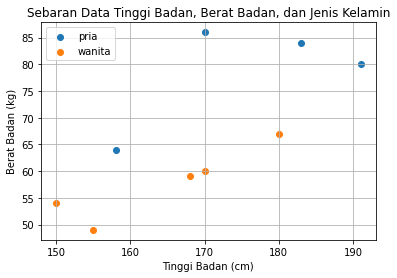

In [2]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Classification dengan KNN

### Preprocessing Dataset

In [3]:
# conversi tinggi badan, berat badan, dan jenis kelamin ke numpy array
import numpy as np

x_train= np.array(sensus_df[['tinggi', 'berat']])
y_train= np.array(sensus_df['jk'])

print(f'x_train:\n{x_train}\n')
print(f'y_train:{y_train}')

x_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [168  59]
 [180  67]
 [150  54]
 [170  60]]

y_train:['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


note: target dengan tipe data String masih dapat di proses dengan baik hanya saja akan mengalami kendalai saat evaluasi model

In [4]:
# conversi nilai string menjadi numerik dengan menggunakan LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


note: 
Dengan menggunakan LabelBinarizer secara tidak langsung kita juga mengkonversi data kita menjadi array dua dimensi
- 0 --> Pria
- 1 --> Wanita

In [5]:
#merubah kembali menajdi array satu dimensi
y_train=y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


### Training KNN Classification Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

K=3 #parameter ini digunakan untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prediksi Jenis Kelamin

In [9]:
tinggi_badan = 155
berat_badan= 70
x_new= np.array([tinggi_badan, berat_badan]).reshape(1, -1)
x_new

array([[155,  70]])

note: karna hanya terdapat satu dataset saja maka perlu direshape menjadi array dua dimensi

In [12]:
y_new= model.predict(x_new)
y_new

array([1])

In [14]:
lb.inverse_transform(y_new)#melihat nilai 1 itu apa

array(['wanita'], dtype='<U6')

### Visualisasi Nearest Neighbours

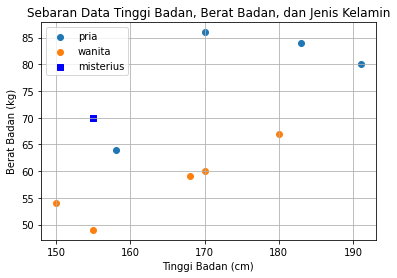

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='blue',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Kalkulasi Distance (Euclidean Distance)

_distance_ = $\sqrt{(t_1 - t_2)^2 + (b_1 - b_2)^2} $

Referensi: https://en.wikipedia.org/wiki/Euclidean_distance

In [19]:
misterius= np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [20]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [168,  59],
       [180,  67],
       [150,  54],
       [170,  60]], dtype=int64)

In [22]:
from scipy.spatial.distance import euclidean

data_jarak= [euclidean(misterius, d) for d in x_train]#euclidean digunakan untuk mengukur jarak antara data poin misterius dengan data poin lain di dalam variable x_train
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 17.029386365926403,
 25.179356624028344,
 16.76305461424021,
 18.027756377319946]

In [24]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])#urutannya dari nilai terkecil (ascending)

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
7,150,54,wanita,16.763055
5,168,59,wanita,17.029386
8,170,60,wanita,18.027756
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


## Evaluasi KNN Classification Model

### Testing Set

In [25]:
x_test= np.array([[168, 65], [180,96],[160,52],[169,67]])
y_test= lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()#flatten ada agar array array yang dihasilkan satu dimensi

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}\n')

x_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]



### Prediksi terhadap testing set

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

### Evaluasi model dengan Accuracy score

Accuracy adalah proporsi dari instances pada train test yang diklasifikasikan secara benar atau diprediksi secara tepat

### _accuracy_ = $\frac{tp+tn}{tp+tn+fp+fn}$

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.75


### Evaluasi model dengan Precission score

Precission adalah proporsi dari testing set yang diprediksi sebagai postif oleh model yang memang benar-benar postif

### _precission_ = $\frac {tp}{tp+fp}$

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

In [28]:
from sklearn.metrics import precision_score
prec= precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.6666666666666666


### Evaluasi model dengan Recall score

Recall adalah proporsi dari data pada testing set kita yang memang benar-benar postif yang diprediksi postif

_recall_ = $\frac{tp}{tp+fn}$

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

In [31]:
from sklearn.metrics import recall_score
rec= recall_score(y_test, y_pred)
print(f'Recall:{rec}')

Recall:1.0


### Evaluasi model dengan F1 score

F1 Score adalah harmonic mean dari precission dan recall

### _F1_ = $2 x \frac {precission x recall} {precission +recall}$

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

In [32]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.8


### Evaluasi model dengan Classifaction Report

Keemmpat matrix evaluasi yang ada di bagian-bagian sebelumnya bisa kita tampilkan sebagai classification Report

In [34]:
from sklearn.metrics import classification_report
cls_report = classification_report (y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Evaluasi model dengan Matthews Correlation Coefficient (MCC)

- MCC adalah alternative untuk F1 score untuk keperluan pengukuran performa dari binary classifiers
- Nilai tertinggi MCC adalah 1
- Kalo prediksinya dilakukan secara random dan ngawur maka nilai scorenya akan 0, atau model classifiernya benar-benar ngaco maka nilai scorenya akan -1

### _MCC_ = $\frac {tp X tn + fp X fn} {\sqrt (tp + fp) X (tp+fn) X (tn+fp) X (tn+fn)}$

Referensi: https://en.wikipedia.org/wiki/Matthews_correlation_coefficient

In [35]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC:{mcc}')

MCC:0.5773502691896258


source: https://www.youtube.com/watch?v=4zARMcgc7hA&t=897s Trs_m